In [1]:
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as stats
import scipy.optimize as opt
import json as json
import matplotlib as mpl
from math import exp
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
from IPython.display import display
from IPython.core.display import HTML
rnd.seed(2)
import warnings
from tqdm import tqdm_notebook as tqdm
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

## In both synthetic data and actual data, estimated values are almost the same but not exactly.


## Reasons:
1. Difference between Partial ML and Full ML
"the parameter estimates and standard errors produced using l2 were nearly identical to the fully efficient estimates." NEARLY???
2. Optimization and coding

## Use synthetic data

In [ ]:
lin_dataframe = pd.read_csv("D:/data/Rust/Lin_Dataset.csv")

In [ ]:
lin_dataframe.tail(100)

,Identifier,Choice,Mileage,State
100900,901.0,0.0,40379.412470,8.0
100901,902.0,0.0,5879.519256,1.0
100902,903.0,0.0,70358.851822,14.0
100903,904.0,0.0,48707.954326,9.0
100904,905.0,0.0,10802.099511,2.0
100905,906.0,0.0,10801.290656,2.0
100906,907.0,0.0,16152.055338,3.0
100907,908.0,0.0,10776.370425,2.0
100908,909.0,0.0,49200.970480,9.0
100909,910.0,0.0,46972.085522,9.0


In [6]:
def lin_cost(s, params):
    theta1_1, = params
    return s*theta1_1

In [7]:
def myopic_costs(S, params, MF):
    rc = params[0]
    thetas = params[1:]
    maint_cost = [MF(s, thetas) for s in range(0, S)]
    repl_cost = [rc for state in range(0, S)]
    return np.vstack((maint_cost, repl_cost)).T

In [8]:
def choice_prob(cost_array, beta, myopic, S):
        
    util = np.exp(myopic + beta*cost_array)
    num = np.concatenate([np.exp(myopic + beta*cost_array)[:,0],
                              np.exp(myopic + beta*cost_array)[:,1]]).reshape(2,S)
    den = np.exp(myopic + beta*cost_array).sum(axis = 1)
    pchoice = num/den
        
    result = [pchoice[:,i].tolist() for i in range(S)]
        
    return np.array(result)

In [9]:
def contraction_mapping(S, p, MF, params, beta, threshold=1e-6, suppr_output=False):
    
    achieved = True
    ST_mat = np.zeros((S, S))
    p = np.array(p) 
    for i in range(S):
        for j, _p in enumerate(p):
            if i + j < S-1:
                ST_mat[i+j][i] = _p
                
            elif i + j == S-1:
                ST_mat[S-1][i] = p[j:].sum()
            else:
                pass
    
    R_mat = np.vstack((np.ones((1, S)),np.zeros((S-1, S))))        
            
    # Initialization of the expected value (which is also the myopic
    # decision cost of the agent). Here, the forward-looking component is initialized at 0.

    # Initialization
    EV_myopic = EV_new = -myopic_costs(S=S, params = params, MF=MF)
    EV = np.zeros((S, 2))
    k = 0

    while abs(EV_new - EV).max() > threshold:
            
        EV = EV_new 
        ecost = np.log(np.sum(np.exp(EV_myopic + beta * EV), axis=1)).reshape(1,S)
            
        futil_maint = np.dot(ecost, ST_mat)
        futil_repl = np.dot(ecost, R_mat)
            
        EV_new = np.vstack((futil_maint, futil_repl)).T
            
        k += 1
        if k == 1000:
            achieved = False
            break


    if not suppr_output:
        if achieved:
            print("Convergence achieved in {} iterations".format(k))
        else:
            print("CM could not converge! Mean difference = {:.6f}".format((EV_new-EV).mean()))

    return (choice_prob(cost_array=EV_new, beta=0.75, myopic=EV_myopic, S=S),
            choice_prob(cost_array=EV_myopic, beta=0.75, myopic=EV_myopic, S=S))

## Inner loop

In [10]:
class DynamicLogit(object):
    def __init__(self, data, Y, X, p, MF, npars, x0, beta, State):       
        self.x0 = x0
        self.beta = beta
        
        self.endog = data.loc[:, Y].values
        self.exog = data.loc[:, X].values
    
        self.N = self.endog.shape[0]
        #self.S = int(self.exog.max()*2)
        self.S = State
        
        p = np.array(p) 
        self.p = p
        self.MF = MF
        self.npars = npars
        
        S = self.S
              
        self.state_mat = np.array([[self.exog[i]==s for i in range(self.N)] 
                                                    for s in range(self.S)])
        
        self.trans_mat = np.zeros((S, S))
        
        for i in range(S):
            for j, _p in enumerate(self.p):
                if i + j < S-1:
                    self.trans_mat[i+j][i] = _p
                elif i + j == S-1:
                    self.trans_mat[S-1][i] = p[j:].sum()
                else:
                    pass

        self.regen_mat = np.vstack((np.ones((1, S)),np.zeros((S-1, S))))
        self.dec_mat = np.vstack(((1-self.endog), self.endog))

    
    def myopic_costs(self, params):
        S = self.S
        
        rc = params[0]
        thetas = params[1:]
        maint_cost = [self.MF(s, thetas) for s in range(0, S)]
        repl_cost = [rc for state in range(0, S)]
        return np.vstack((maint_cost, repl_cost)).T
    
    
    #Contraction Mapping
    def fl_costs(self, params, threshold=1e-8, suppr_output=False):
        
        achieved = True
        # Initialization
        EV_myopic = EV_new = -self.myopic_costs(params = params)
        self.myopic = EV_myopic
        EV = np.zeros((self.S, 2))
        k = 0

        while abs(EV_new - EV).max() > threshold:
            
            EV = EV_new 
            ecost = np.log(np.sum(np.exp(EV_myopic + self.beta * EV), axis=1)).reshape(1,self.S)
            
            futil_maint = np.dot(ecost, self.trans_mat)
            futil_repl = np.dot(ecost, self.regen_mat)
            
            EV_new = np.vstack((futil_maint, futil_repl)).T
            
            k += 1
            if k == 1000:
                achieved = False
                break

        # Output:
        if not suppr_output:
            if achieved:
                print("Convergence achieved in {} iterations".format(k))
            else:
                print("CM could not converge! Mean difference = {:.6f}".format(
                                                            (EV_new-EV).mean())
                                                                              )
            
        return EV_new

    def choice_prob(self, cost_array):
        
        util = np.exp(self.myopic + self.beta*cost_array)
        num = np.concatenate([np.exp(self.myopic + self.beta*cost_array)[:,0],
                              np.exp(self.myopic + self.beta*cost_array)[:,1]]).reshape(2,self.S)
        den = np.exp(self.myopic + self.beta*cost_array).sum(axis = 1)
        pchoice = num/den
        
        result = [pchoice[:,i].tolist() for i in range(self.S)]
        
        return np.array(result)
        
    def loglike(self, params):
        
        util = self.fl_costs(params, suppr_output=True) 
        pchoice = self.choice_prob(util) 
        logprob = np.log(np.dot(pchoice.T, self.state_mat))
        return -np.sum(self.dec_mat*logprob)
    
    def fit_likelihood(self,bounds=None):
        
        if bounds == None:
            bounds = [(1e-8, None) for i in range(self.npars)]
            
        self.fitted = opt.fmin_l_bfgs_b(self.loglike, x0= self.x0, 
                                        approx_grad=True, bounds=bounds)
    
    
    def get_parameters(self):
        return self.fitted[0]
        
    def print_parameters(self):
        loglike =  self.fitted[1]
        fit_params = self.get_parameters()
        RC, thetas = fit_params[0], fit_params[1:]
        logstring = "Log-likelihood = {0:.2f}".format(loglike)
        thetas_string = ["theta1_{0} = {1:.4f}".format(i+1, t) \
                                                for i, t in enumerate(thetas)]
        thetas_string = ", ".join(thetas_string)
        rc_string = "Parameters: RC = {0:.4f}".format(RC)
        print(logstring, rc_string + ", " + thetas_string)

In [11]:
p = (0.36, 0.48, 0.16)
x0 = [[20, 0.1]]

In [12]:
lin_to_lin = DynamicLogit(lin_dataframe, "Choice", "State", p, 
                              lin_cost, npars=2, x0=x0, beta = 0.75, State=90)
lin_to_lin.fit_likelihood()

NameError: name 'lin_dataframe' is not defined

In [ ]:
lin_to_lin.print_parameters()

Log-likelihood = 16486.82 Parameters: RC = 18.6030, theta1_1 = 0.5053


## Outer loop

In [ ]:
for i in tqdm(range(10)):
    lin_to_lin = DynamicLogit(lin_dataframe, "Choice", "State", p, 
                              lin_cost, npars=2, x0=x0[i], beta = 0.75)
    lin_to_lin.fit_likelihood()
    x0.append(lin_to_lin.get_parameters().tolist())

In [ ]:
x0

[[0.1, 0.1],
 [18.60297919564112, 0.5052805698942048],
 [18.60297919564112, 0.5052805695963395],
 [18.60297919564112, 0.5052805695967041],
 [18.60297919564072, 0.5052805695967041],
 [18.60297919564072, 0.5052805695967041],
 [18.60297919564072, 0.5052805695967041],
 [18.60297919564072, 0.5052805695967041],
 [18.60297919564072, 0.5052805695967041],
 [18.60297919564072, 0.5052805695967041],
 [18.60297919564072, 0.5052805695967041]]

In [ ]:
lin_forward_app, lin_myopic_app = contraction_mapping(S=90, p=p, 
                                                      MF=lin_cost, params=lin_to_lin.get_parameters(), 
                                                      beta = 0.75)

Convergence achieved in 54 iterations


In [ ]:
params_lin = (20, 0.5)
p = (0.36, 0.48, 0.16)
lin_forward, lin_myopic = contraction_mapping(S=90, p=p, MF=lin_cost, params=params_lin, beta = 0.75)


Convergence achieved in 54 iterations


Text(0.5, 1.0, 'Action probabilities of the Agent (Linear Cost Specification)')

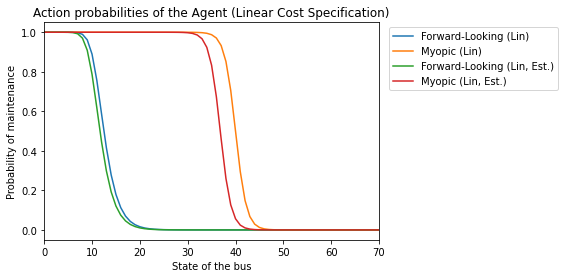

In [ ]:
plt.plot(lin_forward.T[0])
plt.plot(lin_myopic.T[0])
plt.plot(lin_forward_app.T[0])
plt.plot(lin_myopic_app.T[0])
plt.ylabel("Probability of maintenance")
plt.xlabel("State of the bus")
plt.legend(["Forward-Looking (Lin)", "Myopic (Lin)", "Forward-Looking (Lin, Est.)", "Myopic (Lin, Est.)", ], 
           loc='upper right', bbox_to_anchor=(1.55,1))
plt.xlim(0, 70)
plt.title("Action probabilities of the Agent (Linear Cost Specification)")

## Actual data

In [3]:
df = pd.read_csv("C:/Users/haruokakehi/Desktop/data/Rust/bus1234_new.csv")
df = df.drop(["Unnamed: 0", "V1"], axis = 1)

In [4]:
df.tail(100)

,id,group,year,month,replace,miles,trans_5000,trans_2500,state_5000,state_2500
8056,95,530875,1977,2,0,43677,0,1,8,17
8057,95,530875,1977,3,0,47239,0,1,9,18
8058,95,530875,1977,4,0,52644,1,2,10,21
8059,95,530875,1977,5,0,57502,0,1,11,23
8060,95,530875,1977,6,0,62382,0,1,12,24
8061,95,530875,1977,7,0,67428,1,2,13,26
8062,95,530875,1977,8,0,72655,1,2,14,29
8063,95,530875,1977,9,0,76831,0,1,15,30
8064,95,530875,1977,10,0,81968,1,2,16,32
8065,95,530875,1977,11,0,85994,0,1,17,34


In [13]:
def lin_cost_rust(s, params):
    theta1_1, = params
    return s*theta1_1*0.001

## 5000 miles, 90 grid

In [22]:
#p = (0.884, 0.112, 1 - 0.884 - 0.114)
p = (0.3919, 0.5953, 1- 0.3919 - 0.5953)
x0 = [[10, 2]]

In [29]:
lin_to_lin = DynamicLogit(df, "replace", "state_5000", p, 
                              lin_cost_rust, npars=2, x0=x0, beta = 0.0001, State=90)
lin_to_lin.fit_likelihood()

In [30]:
lin_to_lin.print_parameters()

Log-likelihood = 304.87 Parameters: RC = 7.4134, theta1_1 = 71.8464


In [17]:
lin_to_lin.print_parameters()

Log-likelihood = 298.90 Parameters: RC = 10.1891, theta1_1 = 2.6040


In [18]:
for i in tqdm(range(10)):
    lin_to_lin = DynamicLogit(df, "replace", "state_5000", p, 
                              lin_cost, npars=2, x0=x0[i], beta = 0.999, State=90)
    lin_to_lin.fit_likelihood()
    x0.append(lin_to_lin.get_parameters().tolist())

## 2500 miles, 175 grid

In [31]:
p = (0.1071, 0.5152, 0.3621, 0.0143, 1 - 0.1071 - 0.5252 - 0.3621 - 0.0143)
#p = (0.293, 0.591, 0.109, 0.00303, 0.00387)
x0 = [[0.1, 0.1]]

In [38]:
lin_to_lin = DynamicLogit(df, "replace", "state_2500", p, 
                              lin_cost_rust, npars=2, x0=x0, beta = 0.9999, State=175)
lin_to_lin.fit_likelihood()

In [39]:
lin_to_lin.print_parameters()

Log-likelihood = 299.51 Parameters: RC = 9.5369, theta1_1 = 1.6163


In [37]:
lin_to_lin.print_parameters()

Log-likelihood = 304.92 Parameters: RC = 7.4287, theta1_1 = 35.9016


In [ ]:
for i in tqdm(range(10)):
    lin_to_lin = DynamicLogit(df, "replace", "state_2500", p, 
                              lin_cost, npars=2, x0=x0[i], beta = 0.999, State=175)
    lin_to_lin.fit_likelihood()
    x0.append(lin_to_lin.get_parameters().tolist())